In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# **Task-1**

Create your own grayscale letters and numbers!

- Take the first two letters of your name and the last two digits of your ID to create a code. For example, a student named “Batman” who has the ID “12345678” will create **BA78** as his code.

- Use a numpy array to create a grayscale image of this code.


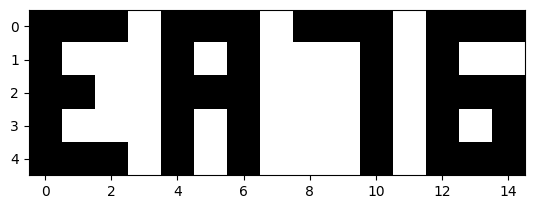

In [6]:
nam_id = np.array( [[0, 0, 0, 255, 0, 0, 0, 256, 0, 0, 0, 255, 0, 0, 0],
                      [0, 255, 255, 255, 0, 255, 0, 255, 255, 255, 0, 255, 0,255, 255],
                      [0, 0, 255, 255, 0, 0, 0, 255, 255, 255, 0, 255, 0, 0, 0],
                      [0, 255, 255, 255, 0, 255, 0, 255, 255, 255, 0, 255, 0, 255, 0],
                      [0, 0, 0, 255, 0, 255, 0, 255, 255, 255, 0, 255, 0, 0, 0]])

plt.imshow(nam_id,cmap='gray')

# **Task-2**

- 5 different transformations on a custom Dataset.

- Explanation of the logic for the tranformation used.



In [ ]:
def crop_img(img):

  print(img.shape)
  print()
  cropped_img=img[150:500, 200:1000]
  return cropped_img

def flip_img(img):
  flipped_img=cv2.flip(img, 0)
  # plt.imshow(flipped_image)
  return flipped_img


def rotate_img(img):
  rows,cols = img.shape[:2]
  M = cv2.getRotationMatrix2D((cols/2,rows/2),-90,0.5)
  rotated_img = cv2.warpAffine(img,M,(cols,rows))
  # plt.imshow(rotated_img)
  return rotated_img


def resize_img(img):
  width = int(img.shape[1] * 0.5)
  height = int(img.shape[0] * 0.5)
  dim = (width, height)
  resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  # plt.imshow(resized_image)
  return resized_img



def stretch_img(img):
  height, width = img.shape[:2]

  stretch_x = 2
  stretch_y = 1.0

  stretch_matrix = np.float32([
      [stretch_x, 0, 0],
      [0, stretch_y, 0]
  ])
  stretched_img=cv2.warpAffine(img, stretch_matrix, (int(width * stretch_x), int(height * stretch_y)))
  # plt.imshow(stretched_image)
  return stretched_img


def img_transformations(img,titles):
  trans_imgs=[]
  trans_imgs.append(img)
  trans_imgs.append(crop_img(img))
  trans_imgs.append(flip_img(img))
  trans_imgs.append(rotate_img(img))
  trans_imgs.append(resize_img(img))
  trans_imgs.append(stretch_img(img))

  plt.figure(figsize=(10, 6))
  for i in range(len(trans_imgs)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(trans_imgs[i])
        plt.title(titles[i])
        plt.axis('off')
  plt.tight_layout()
  plt.show()

Transformations used:
1. Crop: useful when only a part of the image is neeeded
2. Flip: used to flip a photo vertically
3. Rotate: useful to fix the orientation of an image
4. Resize: used when the size of the image needs to be changed
5. Stretch: Stretching an image horizontally 
Each transformation has been demonstated for each image:


Image no.1:
(700, 1500, 3)



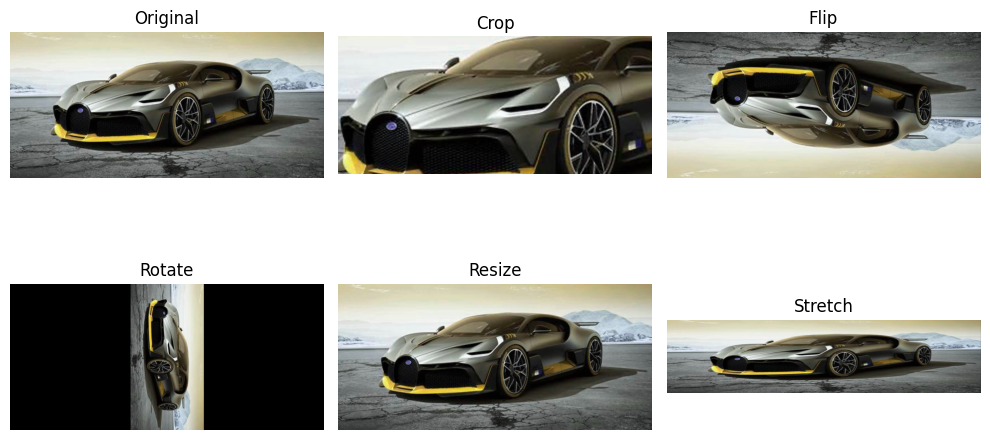


Image no.2:
(1688, 3000, 3)



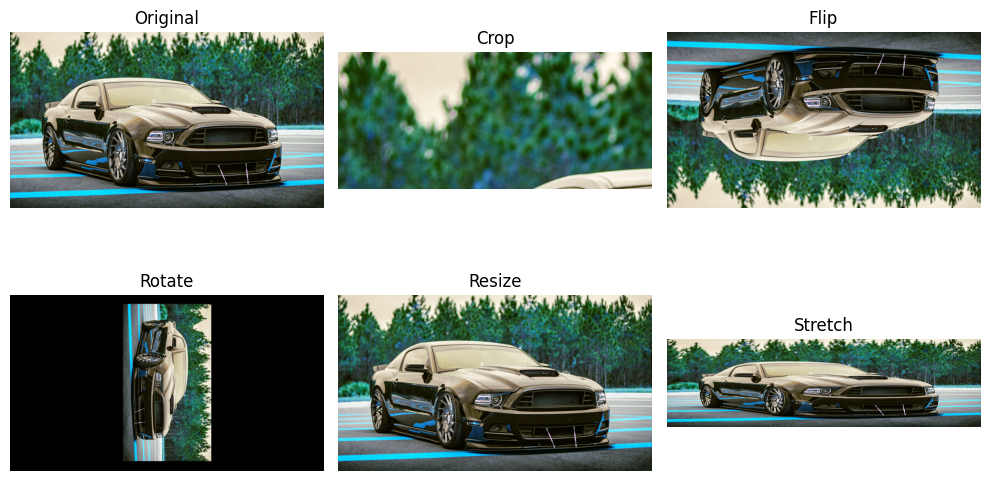


Image no.3:
(1440, 2560, 3)



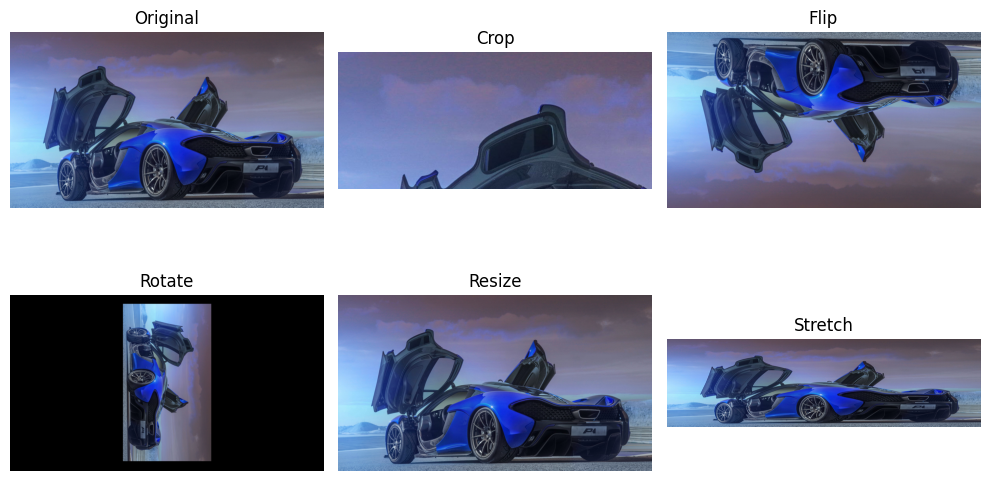


Image no.4:
(720, 1280, 3)



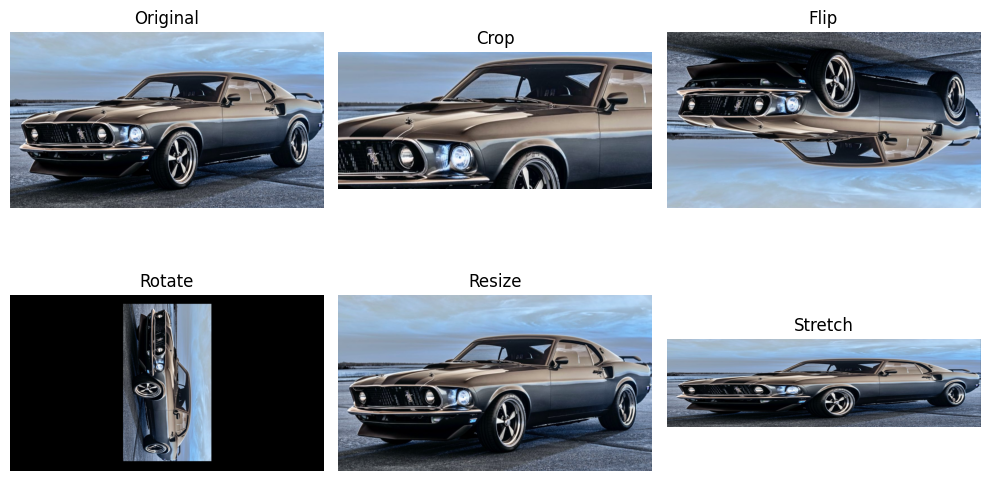


Image no.5:
(1200, 1920, 3)



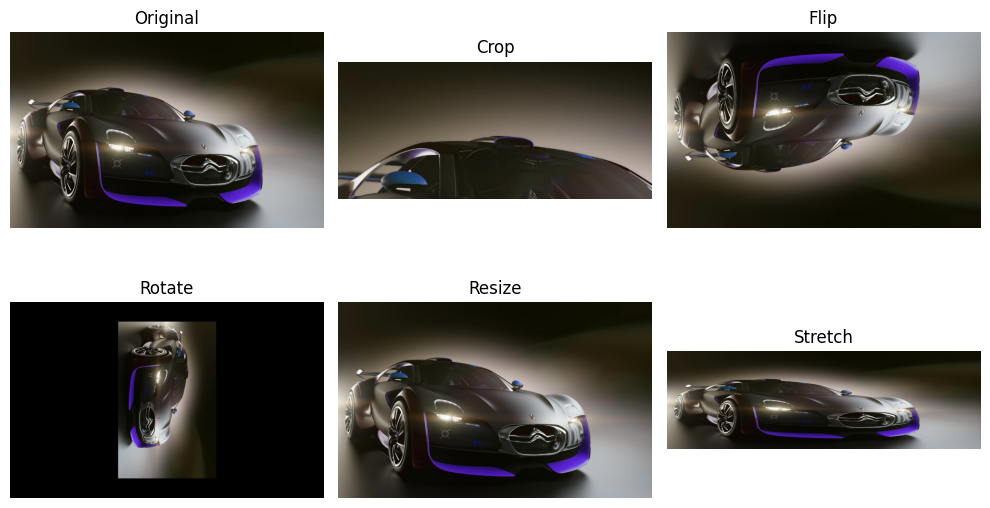


Image no.6:
(417, 626, 3)



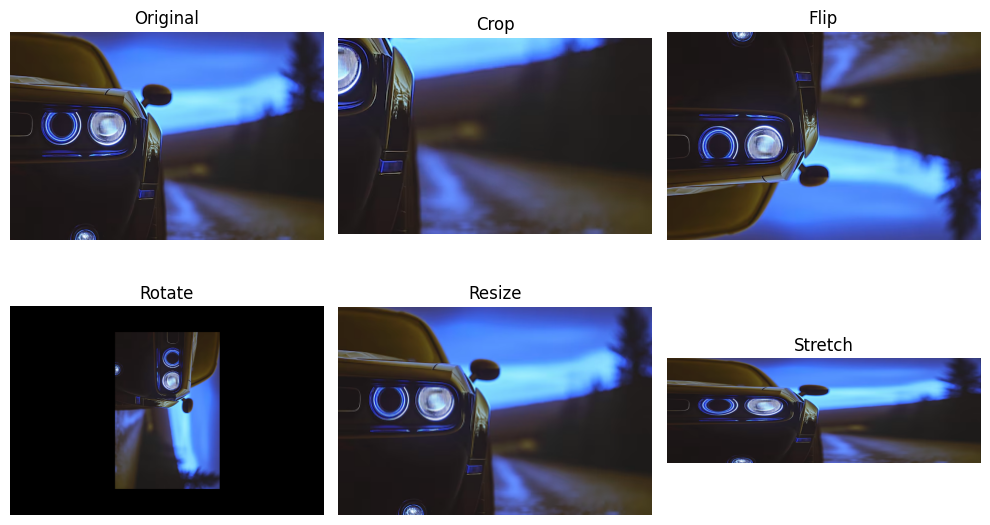


Image no.7:
(1080, 1920, 3)



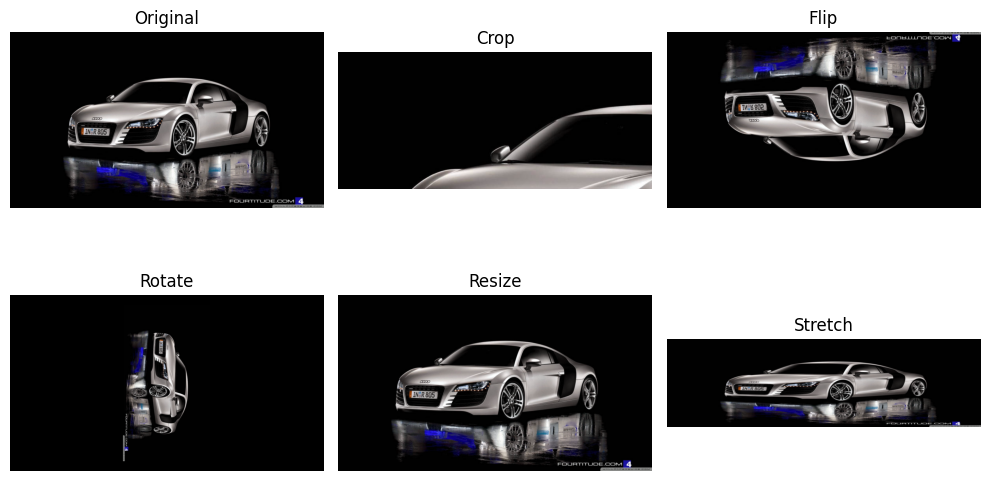


Image no.8:
(600, 1000, 3)



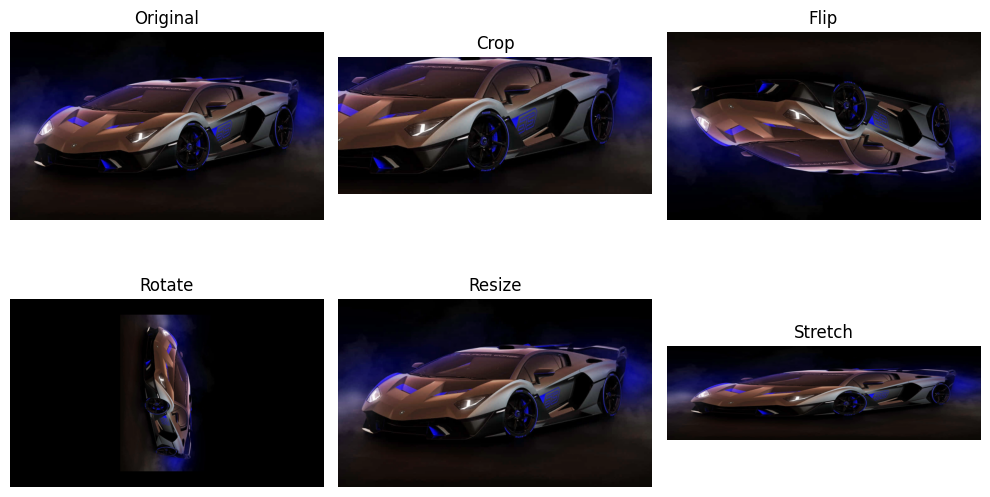


Image no.9:
(1080, 1920, 3)



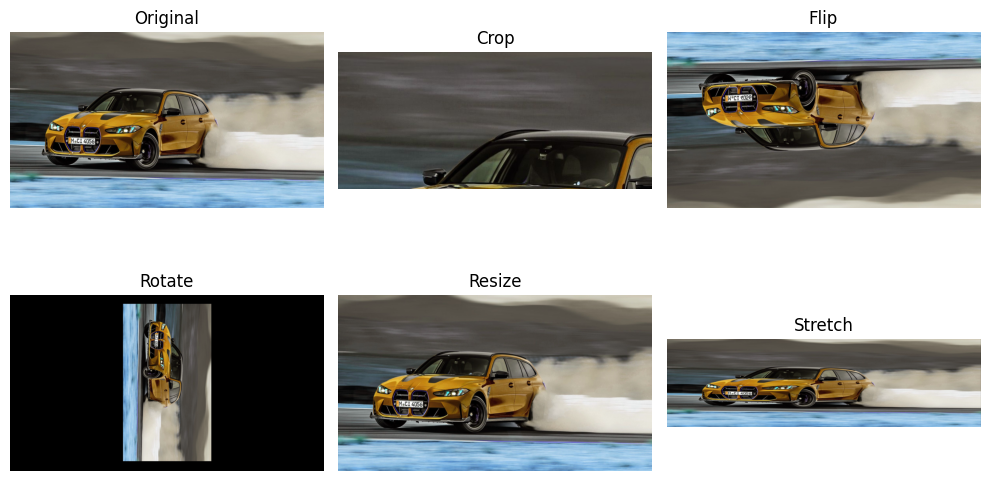


Image no.10:
(1440, 2560, 3)



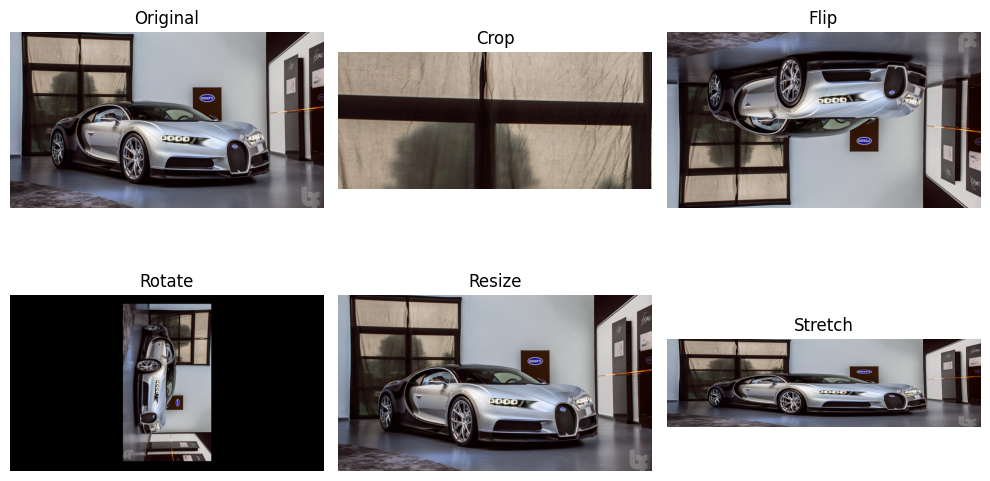

In [ ]:
img1=cv2.imread('/content/sample-1.jpg')
img2=cv2.imread('/content/sample-2.jfif')
img3=cv2.imread('/content/sample-3.jpg')
img4=cv2.imread('/content/sample-4.jpg')
img5=cv2.imread('/content/sample-5.jpg')
img6=cv2.imread('/content/sample-6.jpg')
img7=cv2.imread('/content/sample-7.jpg')
img8=cv2.imread('/content/sample-8.jpg')
img9=cv2.imread('/content/sample-9.jpg')
img10=cv2.imread('/content/sample-10.jpg')

img_list=[img1, img2, img3, img4, img5, img6, img7, img8, img9, img10]
transformations=["Original","Crop","Flip",'Rotate','Resize','Stretch']

print(f'Transformations used:\n'
      f'1. Crop: useful when only a part of the image is neeeded\n'
      f'2. Flip: used to flip a photo vertically\n'
      f'3. Rotate: useful to fix the orientation of an image\n'
      f'4. Resize: used when the size of the image needs to be changed\n'
      f'5. Stretch: Stretching an image horizontally \n'
      f'Each transformation has been demonstated for each image:\n')

for i in range(len(img_list)):
  print()
  print(f'Image no.{i+1}:')
  img_transformations(img_list[i],transformations)



- Creating a dataset with Random Noise.
- Showing before and after.






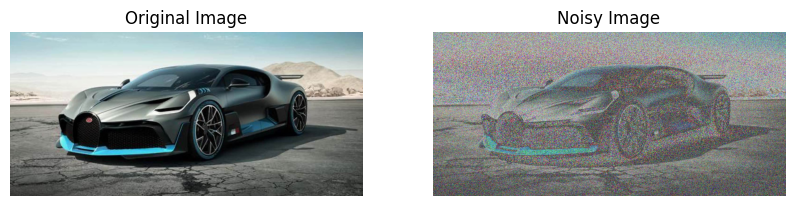

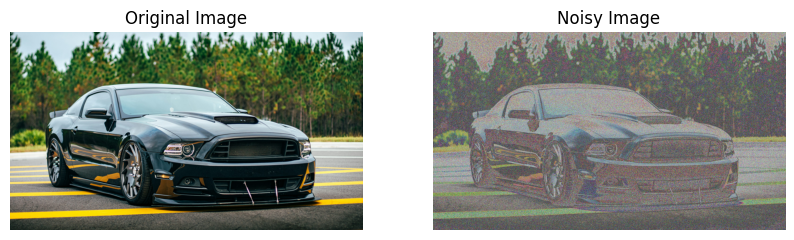

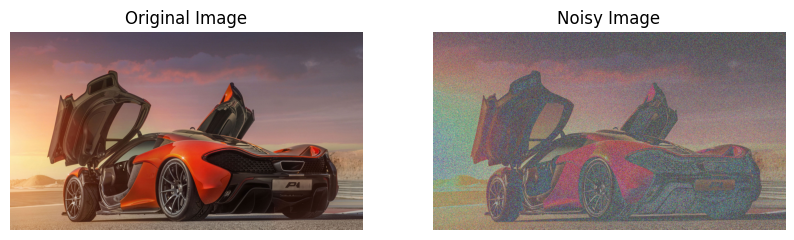

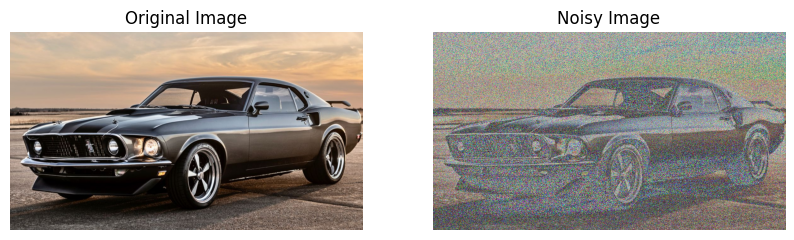

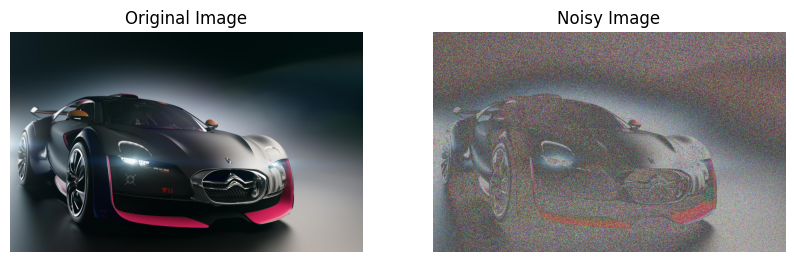

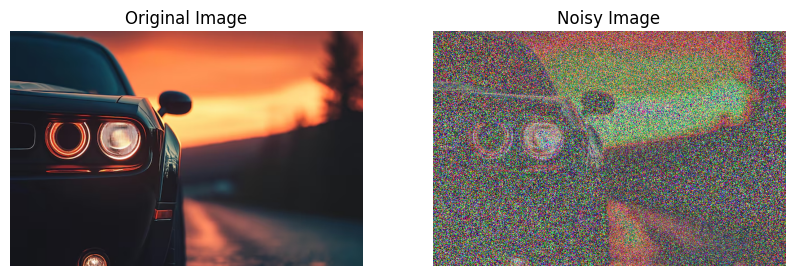

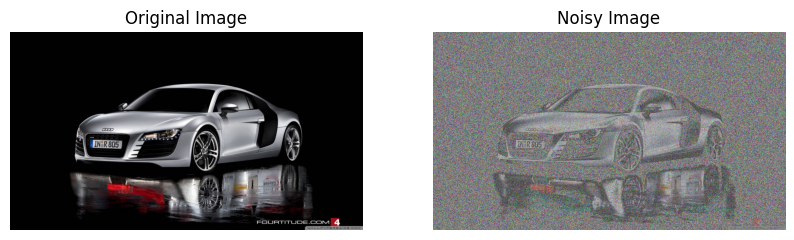

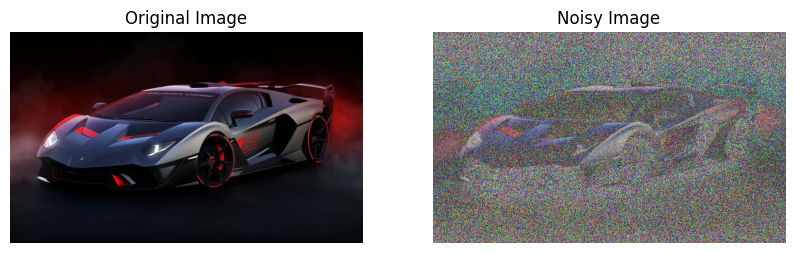

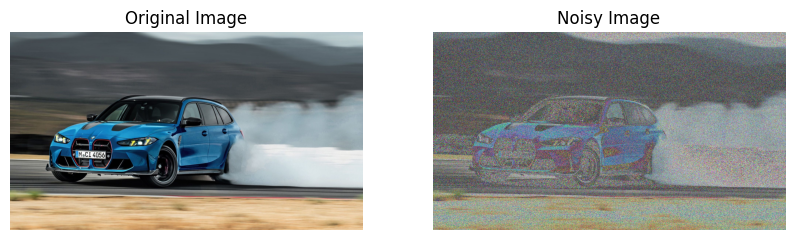

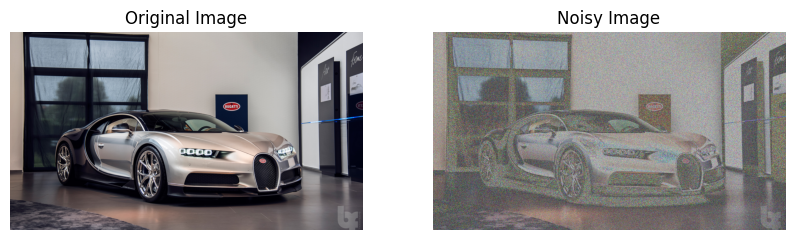

In [ ]:
def random_noise(img):

  # Generate Gaussian noise with the same size as the image
  noise = np.random.randn(*img.shape) * 50

  # Add the noise to the image
  output = img + noise

  # Display the original and noisy images using matplotlib
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.title('Original Image')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title('Noisy Image')
  plt.imshow(cv2.cvtColor(output.astype(np.uint8), cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.show()

for i in img_list:
  random_noise(i)

    Ploting a histogram of the result.

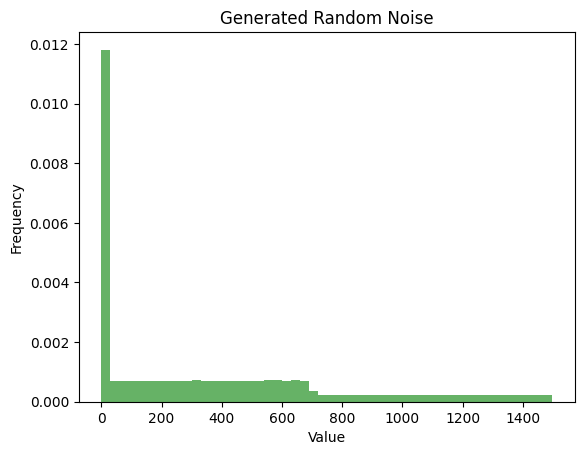

In [ ]:
P = 0.05

noisy_img = np.copy(img1)
num_salt = np.ceil(P * img1.size * 0.5).astype(int)
num_pepper = np.ceil(P * img1.size * 0.5).astype(int)

coords = [np.random.randint(0, i - 1, num_salt) for i in img1.shape]
noisy_img[coords[0], coords[1]] = 255

coords = [np.random.randint(0, i - 1, num_pepper) for i in img1.shape]
noisy_img[coords[0], coords[1]] = 0

random_noise = np.array(coords)

# Flatten the 3D noise array into 1D for histogram plotting
flattened_noise = random_noise.flatten()

# Plot the histogram of the generated Gaussian noise
plt.hist(flattened_noise, bins=50, density=True, alpha=0.6, color='g')
plt.title('Generated Random Noise')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Task-**3**

    Blending images together using varying alpha values to create a smooth transition between them.

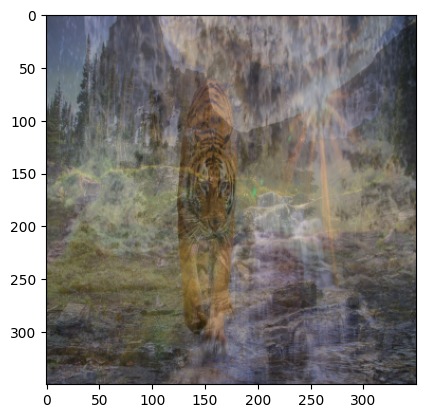

In [ ]:
img_1=cv2.imread('/content/img1.jpg')
img_2=cv2.imread('/content/img2.jpg')
img_3=cv2.imread('/content/img3.jpg')
img_4=cv2.imread('/content/img4.jpg')
img_5=cv2.imread('/content/img5.jpg')

images=[img_1, img_2, img_3, img_4, img_5]

# plt.imshow(img_2)
def img_resize(img):
  dim=(350,350)
  return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

def blend_images(images):
  res = 0
  res=0.1*img_resize(images[0]) + 0.3*img_resize(images[1]) + 0.2*img_resize(images[2]) + 0.3*img_resize(images[3]) + 0.1*img_resize(images[4])
  res = res.astype('uint8')
  plt.imshow(cv2.cvtColor(res.astype(np.uint8), cv2.COLOR_BGR2RGB))
  return res

final_img=blend_images(images)

- Adding Gaussian noise to the final collage to simulate a vintage or artistic effect.
- Plotting a histogram
- Showing before and after.

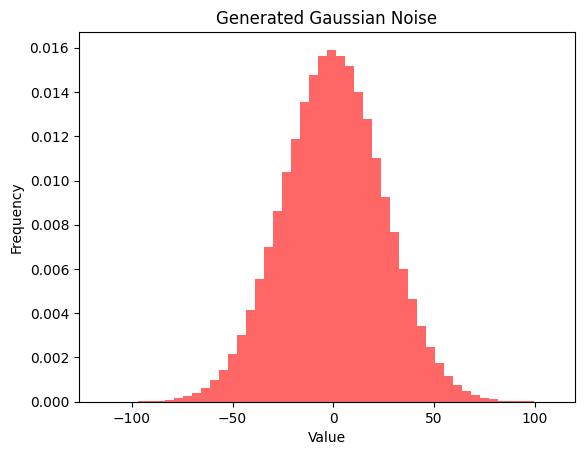

In [ ]:
gaussian_noise = np.random.randn(*final_img.shape) * 25


plt.hist(gaussian_noise.ravel(), bins=50, density=True, alpha=0.6, color='r')
plt.title('Generated Gaussian Noise')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


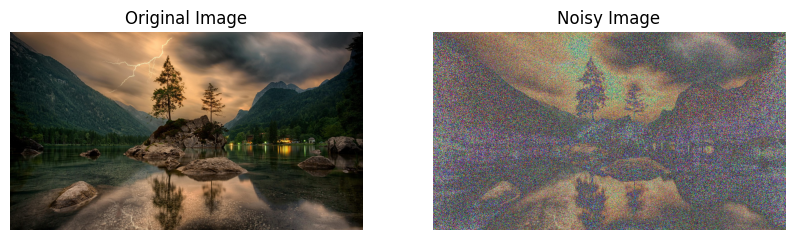

In [ ]:
random_noise(img_1)